## Desafio 01. Histograma de comentários

### Bibliotecas

In [1]:
import pandas as pd

# Módulo de conexão com banco
import sys
sys.path.append('../') 
import funcoesconexao as con

# Desativa warnings
import warnings
warnings.filterwarnings('ignore')

### Carregamento dos Dados

#### Via banco de dados — SQL Server

In [2]:
conexao = con.conectar_bd()

----- Conexão com banco de dados estabelecida com sucesso! -----


In [3]:
# Carregando dataframes
df_usuarios    = con.carregar_dados(conexao, 'usuarios')
df_comentarios = con.carregar_dados(conexao, 'comentarios')

# Fechando conexão
con.fechar_conexao_bd(conexao)

In [4]:
# Exibindo dataframes
display(df_usuarios.head())
display(df_comentarios.head())

,id,nome,data_criacao,localizacao_id,email
0,1,João Silva,2019-10-15,1,joao.silva@empresa.com
1,2,Maria Souza,2019-10-15,2,maria.souza@empresa.com
2,3,Carlos Oliveira,2019-10-15,3,carlos.oliveira@empresa.com
3,4,Ana Pereira,2019-10-15,1,ana.pereira@empresa.com
4,5,Pedro Costa,2019-10-15,2,pedro.costa@empresa.com


,usuario_id,corpo,data_criacao
0,3,"Pensando mais a longo prazo, o fenômeno da Int...",2019-12-02
1,5,"Do mesmo modo, a hegemonia do ambiente polític...",2019-12-03
2,3,É claro que a complexidade dos estudos efetuad...,2019-12-05
3,5,"Todas estas questões, devidamente ponderadas, ...",2019-12-05
4,2,"Percebemos, cada vez mais, que o acompanhament...",2019-12-08


#### Via arquivo .CSV

In [5]:
# Carregando dataframes
df_usuarios    = con.carregar_dados_csv('usuarios.csv')
df_comentarios = con.carregar_dados_csv('comentarios.csv')

In [6]:
# Exibindo dataframes
display(df_usuarios.head())
display(df_comentarios.head())

,id,nome,data_criacao,localizacao_id,email
0,1,João Silva,2019-10-15 00:00:00.000,1,joao.silva@empresa.com
1,2,Maria Souza,2019-10-15 00:00:00.000,2,maria.souza@empresa.com
2,3,Carlos Oliveira,2019-10-15 00:00:00.000,3,carlos.oliveira@empresa.com
3,4,Ana Pereira,2019-10-15 00:00:00.000,1,ana.pereira@empresa.com
4,5,Pedro Costa,2019-10-15 00:00:00.000,2,pedro.costa@empresa.com


,usuario_id,corpo,data_criacao
0,3,"Pensando mais a longo prazo, o fenômeno da Int...",2019-12-02 00:00:00.000
1,5,"Do mesmo modo, a hegemonia do ambiente polític...",2019-12-03 00:00:00.000
2,3,É claro que a complexidade dos estudos efetuad...,2019-12-05 00:00:00.000
3,5,"Todas estas questões, devidamente ponderadas, ...",2019-12-05 00:00:00.000
4,2,"Percebemos, cada vez mais, que o acompanhament...",2019-12-08 00:00:00.000


### Solução

In [7]:
def histograma_comentarios(comentarios: pd.DataFrame, usuarios: pd.DataFrame):
    # Convertendo data_criacao para o tipo DateTime
    comentarios['data_criacao'] = pd.to_datetime(comentarios['data_criacao'])
    
    # Filtrando apenas comentários de Janeiro/2020
    comentarios_janeiro = comentarios[
        (comentarios['data_criacao'].dt.year == 2020) & 
        (comentarios['data_criacao'].dt.month == 1)
    ]

    # Agrupando comentários e calculando a quantidade de comentários por usuário
    comentarios_agrupado = (
        comentarios_janeiro.groupby('usuario_id')
        .agg(quantidade_comentarios=('usuario_id', 'count'))
        .reset_index()
    )

    # Mesclando dataframes
    df_merge = usuarios[['id']].merge(
        comentarios_agrupado, how='left', left_on='id', right_on='usuario_id'
    )

    # Substituindo valores nulos por zero
    df_merge['quantidade_comentarios'].fillna(0, inplace=True)

    # Convertendo quantidade_comentarios para o tipo inteiro
    df_merge['quantidade_comentarios'] = df_merge['quantidade_comentarios'].astype(int)

    # Criando histograma
    histograma = df_merge['quantidade_comentarios'].value_counts().reset_index()
    
    # Renomeando as colunas
    histograma.columns = ['quantidade_comentarios', 'frequencia']
    
    # Ordenando dataframe
    histograma.sort_values(by='quantidade_comentarios', inplace=True)
    
    # Saída
    return histograma

In [8]:
histograma = histograma_comentarios(df_comentarios, df_usuarios)
display(histograma)

,quantidade_comentarios,frequencia
0,0,11
1,2,2
2,3,1
3,5,1


#### Gráfico

In [9]:
import matplotlib.pyplot as plt

def plot_histograma_comentarios(histograma: pd.DataFrame, x_col: str, y_col: str):
    # Configurar o tamanho da imagem
    plt.figure(figsize=(10, 6))
    
    # Extrair dados
    x = histograma[x_col]
    y = histograma[y_col]
    
    # Plotar o gráfico
    plt.bar(x, y, width=0.8, color='DodgerBlue')
    
    # Adicionar títulos e rótulos
    plt.title('Histograma de Comentários - Janeiro de 2020')
    plt.xlabel('Quantidade de Comentários')
    plt.ylabel('Frequência')
    
    # Adicionar rótulos nas barras
    for I in range(len(x)):
        plt.text(x[I], y[I], str(y[I]), ha='center', va='bottom')
    
    # Ajustar os ticks e adicionar grid no eixo y
    plt.xticks(range(int(x.max()) + 1)) 
    plt.yticks(range(int(y.max()) + 2))
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Exibindo plot
    plt.show()

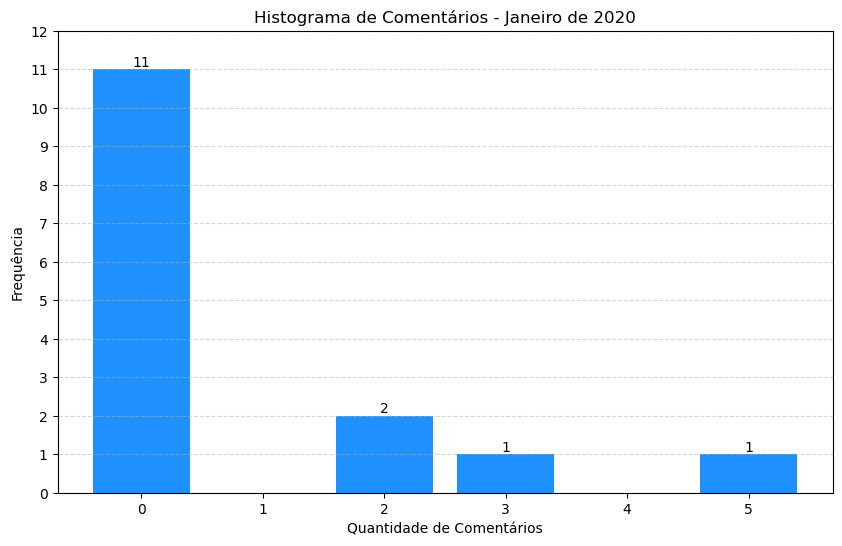

In [10]:
plot_histograma_comentarios(histograma, 'quantidade_comentarios', 'frequencia')